In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
df_pre = pd.read_csv('../Datasets/data/pre_study_questionnaire_updated.csv', sep=",")
df = pd.read_csv('../Datasets/data/post_study_questionnaire_updated.csv', sep=",")
rg_df = pd.read_csv('../Datasets/data/field_data_field_research_group_updated.csv', sep=",")

In [3]:
rg_df = rg_df.drop(['entity_type', 'bundle', 'deleted', 'revision_id', 'language', 'delta'], axis=1)

In [4]:
df = df.drop_duplicates(subset=['UID']) 

In [5]:
df = df[df['Serienummer']>7]

In [6]:
result_df = pd.merge(df,rg_df,how='inner', left_on='UID',right_on='entity_id')

In [7]:
grade_df = df_pre[['UID', 'In welk leerjaar zit je?']]
grade_df.head()

,UID,In welk leerjaar zit je?
0,1846,Anders
1,1847,Anders
2,1854,Anders
3,1864,Anders
4,1865,Anders


In [8]:
result_df = pd.merge(result_df,grade_df,how='inner',left_on='UID',right_on='UID')
result_df = result_df.drop_duplicates(subset=['UID']) 

In [9]:
result_df = result_df[result_df['In welk leerjaar zit je?']!=" Anders"]

In [10]:
print(len(result_df))
print(len(result_df[result_df["field_research_group_value"]==0]))
print(len(result_df[result_df["field_research_group_value"]==1]))
print(len(result_df[result_df["field_research_group_value"]==2]))

37
12
12
13


In [11]:
real_df = result_df[result_df["field_research_group_value"]==0]
placebo_df = result_df[result_df["field_research_group_value"]==1]
nothing_df = result_df[result_df["field_research_group_value"]==2]

In [12]:
q1 = '1. Wiski is zoals een expert (bv. een leerkracht) in wiskunde-oefeningen aanraden.'
q2 = '2. Wiski heeft de expertise (kennis) om mijn wiskundeniveau te kunnen inschatten.'
q3 = '3. Wiski kan mijn wiskundeniveau inschatten.'
q4 = '4. Wiski begrijpt de moeilijkheidsgraad van wiskunde-oefeningen goed.'
q5 = '5. Wiski houdt rekening met mijn wiskundeniveau om oefeningen aan te raden.'
q6 = '6. Wiski zet op de eerste plaats dat ik vorderingen maak in wiskunde.'
q7 = '7. Wanneer Wiski oefeningen aanraadt, doet Wiski dat zodat ik vorderingen maak in wiskunde.'
q8 = '8. Wiski wilt mijn wiskundeniveau goed inschatten.'
q9 = '9. Wiski raadt oefeningen op een zo correct mogelijke manier aan.'
q10 = '10. Wiski is eerlijk.'
q11 = '11. Wiski maakt oprechte aanbevelingen.'
q12 = '12. Ik vertrouw Wiski om mij wiskunde-oefeningen aan te raden.'
q13 = '13. Als ik nog eens online wiskunde-oefeningen maak, dan kies ik voor Wiski.'
q14 = '14. Als ik nog eens wiskunde-oefeningen aangeraden wil krijgen, dan kies ik voor Wiski.'
q15 = '15. Ik vind dat Wiski genoeg uitleg geeft over waarom een oefening aangeraden is.'
q16 = '16. Wanneer ik Wiski gebruik, wil ik GEEN uitleg over waarom een oefening wordt aangeraden.'
q17 = '17. Ik vind uitleg krijgen over waarom een oefening wordt aangeraden belangrijker dan waarom een film wordt aangeraden.'
q18 = '18. Ik ben NIET blij met het niveau van de oefeningen die Wiski aanraadde.'
q19 = '19. In het algemeen vind ik het belangrijk om uitleg te krijgen wanneer iets (oefening/film/product/...) wordt aangeraden.'

In [13]:
# real explanations 
group_df = real_df
rq1 = group_df[q1].value_counts().to_dict()
rq2 = group_df[q2].value_counts().to_dict()
rq3 = group_df[q3].value_counts().to_dict()
rq4 = group_df[q4].value_counts().to_dict()
rq5 = group_df[q5].value_counts().to_dict()
rq6 = group_df[q6].value_counts().to_dict()
rq7 = group_df[q7].value_counts().to_dict()
rq8 = group_df[q8].value_counts().to_dict()
rq9 = group_df[q9].value_counts().to_dict()
rq10 = group_df[q10].value_counts().to_dict()
rq11 = group_df[q11].value_counts().to_dict()
rq12 = group_df[q12].value_counts().to_dict()
rq13 = group_df[q13].value_counts().to_dict()
rq14 = group_df[q14].value_counts().to_dict()
rq15 = group_df[q15].value_counts().to_dict()
rq16 = group_df[q16].value_counts().to_dict()
rq17 = group_df[q17].value_counts().to_dict()
rq18 = group_df[q18].value_counts().to_dict()
rq19 = group_df[q19].value_counts().to_dict()
print(rq1)

{' Eens': 9, ' Eerder eens': 2, ' Eerder oneens': 1}


In [14]:
# placebo explanations 
group_df = placebo_df
pq1 = group_df[q1].value_counts().to_dict()
pq2 = group_df[q2].value_counts().to_dict()
pq3 = group_df[q3].value_counts().to_dict()
pq4 = group_df[q4].value_counts().to_dict()
pq5 = group_df[q5].value_counts().to_dict()
pq6 = group_df[q6].value_counts().to_dict()
pq7 = group_df[q7].value_counts().to_dict()
pq8 = group_df[q8].value_counts().to_dict()
pq9 = group_df[q9].value_counts().to_dict()
pq10 = group_df[q10].value_counts().to_dict()
pq11 = group_df[q11].value_counts().to_dict()
pq12 = group_df[q12].value_counts().to_dict()
pq13 = group_df[q13].value_counts().to_dict()
pq14 = group_df[q14].value_counts().to_dict()
pq15 = group_df[q15].value_counts().to_dict()
pq16 = group_df[q16].value_counts().to_dict()
pq17 = group_df[q17].value_counts().to_dict()
pq18 = group_df[q18].value_counts().to_dict()
pq19 = group_df[q19].value_counts().to_dict()
print(pq1)

{' Eens': 4, ' Eerder eens': 4, ' Oneens': 1, ' Helemaal eens': 1, ' Neutraal': 1, ' Helemaal oneens': 1}


In [15]:
# no explanations 
group_df = nothing_df
nq1 = group_df[q1].value_counts().to_dict()
nq2 = group_df[q2].value_counts().to_dict()
nq3 = group_df[q3].value_counts().to_dict()
nq4 = group_df[q4].value_counts().to_dict()
nq5 = group_df[q5].value_counts().to_dict()
nq6 = group_df[q6].value_counts().to_dict()
nq7 = group_df[q7].value_counts().to_dict()
nq8 = group_df[q8].value_counts().to_dict()
nq9 = group_df[q9].value_counts().to_dict()
nq10 = group_df[q10].value_counts().to_dict()
nq11 = group_df[q11].value_counts().to_dict()
nq12 = group_df[q12].value_counts().to_dict()
nq13 = group_df[q13].value_counts().to_dict()
nq14 = group_df[q14].value_counts().to_dict()
nq15 = group_df[q15].value_counts().to_dict()
nq16 = group_df[q16].value_counts().to_dict()
nq17 = group_df[q17].value_counts().to_dict()
nq18 = group_df[q18].value_counts().to_dict()
nq19 = group_df[q19].value_counts().to_dict()
print(nq1)

{' Eerder eens': 5, ' Eens': 5, ' Neutraal': 3}


In [16]:
def convert_likert_to_int(d):
    converted = dict()
    for pair in d.items():
        key = pair[0].strip()
        value = pair[1]
        if key == "Helemaal oneens":
            converted[1] = int(value)
        elif key == "Oneens":
            converted[2] = int(value)
        elif key == "Eerder oneens":
            converted[3] = int(value)
        elif key == "Neutraal":
            converted[4] = int(value)
        elif key == "Eerder eens":
            converted[5] = int(value)
        elif key == "Eens":
            converted[6] = int(value)
        elif key == "Helemaal eens":
            converted[7] = int(value)
        else:
            print(key)
    return converted

In [17]:
# real converted to values
rqv1 = convert_likert_to_int(rq1)
rqv2 = convert_likert_to_int(rq2)
rqv3 = convert_likert_to_int(rq3)
rqv4 = convert_likert_to_int(rq4)
rqv5 = convert_likert_to_int(rq5)
rqv6 = convert_likert_to_int(rq6)
rqv7 = convert_likert_to_int(rq7)
rqv8 = convert_likert_to_int(rq8)
rqv9 = convert_likert_to_int(rq9)
rqv10 = convert_likert_to_int(rq10)
rqv11 = convert_likert_to_int(rq11)
rqv12 = convert_likert_to_int(rq12)
rqv13 = convert_likert_to_int(rq13)
rqv14 = convert_likert_to_int(rq14)
rqv15 = convert_likert_to_int(rq15)
rqv16 = convert_likert_to_int(rq16)
rqv17 = convert_likert_to_int(rq17)
rqv18 = convert_likert_to_int(rq18)
rqv19 = convert_likert_to_int(rq19)
print(rqv1)

{6: 9, 5: 2, 3: 1}


In [18]:
# placebo converted to values
pqv1 = convert_likert_to_int(pq1)
pqv2 = convert_likert_to_int(pq2)
pqv3 = convert_likert_to_int(pq3)
pqv4 = convert_likert_to_int(pq4)
pqv5 = convert_likert_to_int(pq5)
pqv6 = convert_likert_to_int(pq6)
pqv7 = convert_likert_to_int(pq7)
pqv8 = convert_likert_to_int(pq8)
pqv9 = convert_likert_to_int(pq9)
pqv10 = convert_likert_to_int(pq10)
pqv11 = convert_likert_to_int(pq11)
pqv12 = convert_likert_to_int(pq12)
pqv13 = convert_likert_to_int(pq13)
pqv14 = convert_likert_to_int(pq14)
pqv15 = convert_likert_to_int(pq15)
pqv16 = convert_likert_to_int(pq16)
pqv17 = convert_likert_to_int(pq17)
pqv18 = convert_likert_to_int(pq18)
pqv19 = convert_likert_to_int(pq19)

In [19]:
# nothing converted to values
nqv1 = convert_likert_to_int(nq1)
nqv2 = convert_likert_to_int(nq2)
nqv3 = convert_likert_to_int(nq3)
nqv4 = convert_likert_to_int(nq4)
nqv5 = convert_likert_to_int(nq5)
nqv6 = convert_likert_to_int(nq6)
nqv7 = convert_likert_to_int(nq7)
nqv8 = convert_likert_to_int(nq8)
nqv9 = convert_likert_to_int(nq9)
nqv10 = convert_likert_to_int(nq10)
nqv11 = convert_likert_to_int(nq11)
nqv12 = convert_likert_to_int(nq12)
nqv13 = convert_likert_to_int(nq13)
nqv14 = convert_likert_to_int(nq14)
nqv15 = convert_likert_to_int(nq15)
nqv16 = convert_likert_to_int(nq16)
nqv17 = convert_likert_to_int(nq17)
nqv18 = convert_likert_to_int(nq18)
nqv19 = convert_likert_to_int(nq19)

In [20]:
rqv = [rqv1,
rqv2,
rqv3,
rqv4,
rqv5,
rqv6,
rqv7,
rqv8,
rqv9,
rqv10,
rqv11,
rqv12,
rqv13,
rqv14,
rqv15,
rqv16,
rqv17,
rqv18,
rqv19]
print(rqv)

[{6: 9, 5: 2, 3: 1}, {6: 6, 5: 3, 4: 1, 7: 1, 3: 1}, {6: 7, 7: 2, 5: 1, 4: 1, 2: 1}, {6: 7, 7: 2, 4: 2, 5: 1}, {7: 5, 6: 3, 5: 3, 3: 1}, {6: 8, 7: 2, 5: 2}, {6: 6, 5: 3, 4: 2, 7: 1}, {7: 6, 6: 6}, {6: 8, 5: 2, 7: 2}, {7: 6, 5: 4, 4: 1, 6: 1}, {7: 6, 6: 5, 4: 1}, {6: 5, 7: 4, 5: 2, 3: 1}, {6: 6, 5: 2, 7: 2, 4: 2}, {6: 8, 5: 2, 7: 1, 4: 1}, {7: 5, 4: 2, 3: 2, 5: 2, 6: 1}, {2: 4, 1: 2, 3: 2, 4: 2, 6: 1, 5: 1}, {4: 4, 5: 2, 7: 2, 2: 2, 3: 1, 1: 1}, {2: 5, 3: 3, 4: 2, 1: 1, 7: 1}, {6: 5, 4: 4, 5: 3}]


In [21]:
pqv = [pqv1,
pqv2,
pqv3,
pqv4,
pqv5,
pqv6,
pqv7,
pqv8,
pqv9,
pqv10,
pqv11,
pqv12,
pqv13,
pqv14,
pqv15,
pqv16,
pqv17,
pqv18,
pqv19]
print(pqv)

[{6: 4, 5: 4, 2: 1, 7: 1, 4: 1, 1: 1}, {6: 4, 4: 3, 3: 2, 5: 2, 7: 1}, {6: 5, 4: 4, 5: 2, 3: 1}, {6: 5, 3: 3, 5: 2, 7: 1, 4: 1}, {6: 8, 5: 1, 3: 1, 4: 1, 7: 1}, {6: 4, 7: 3, 4: 3, 5: 2}, {6: 5, 5: 3, 7: 2, 2: 1, 4: 1}, {6: 8, 4: 2, 7: 1, 2: 1}, {6: 8, 4: 2, 7: 1, 3: 1}, {6: 6, 7: 2, 4: 2, 3: 1, 5: 1}, {6: 6, 4: 4, 7: 1, 3: 1}, {6: 6, 4: 2, 5: 1, 3: 1, 7: 1, 2: 1}, {6: 6, 5: 4, 4: 1, 2: 1}, {6: 7, 3: 2, 5: 1, 7: 1, 4: 1}, {5: 4, 3: 3, 6: 2, 4: 2, 2: 1}, {2: 5, 1: 3, 5: 2, 4: 2}, {6: 4, 5: 3, 4: 2, 3: 2, 2: 1}, {2: 5, 1: 4, 4: 3}, {5: 3, 6: 3, 4: 3, 3: 2, 7: 1}]


In [22]:
nqv = [nqv1,
nqv2,
nqv3,
nqv4,
nqv5,
nqv6,
nqv7,
nqv8,
nqv9,
nqv10,
nqv11,
nqv12,
nqv13,
nqv14,
nqv15,
nqv16,
nqv17,
nqv18,
nqv19]

In [23]:
def calclulate_values_per_question(list_of_dicts):
    result = []
    for dic in list_of_dicts:
        to_add = 0
        for pair in dic.items():
            key = pair[0]
            value = pair[1]
            to_add += key * value
        result.append(to_add)
    return result

In [24]:
def calculate_average_per_construct(lijst, num_students):
    result = dict()
    result["competence"] = sum(lijst[0:5])/num_students
    result["benevolence"] = sum(lijst[5:8])/num_students
    result["integrity"] = sum(lijst[8:11])/num_students
    result["explicit_trust"] = lijst[11]/num_students
    result["intention_to_return"] = sum(lijst[12:14])/num_students
    result["perceived_transparency"] = lijst[14]/num_students
    result["16"] = lijst[15]/num_students
    result["17"] = lijst[16]/num_students  
    result["18"] = lijst[17]/num_students
    result["19"] = lijst[18]/num_students
    return result
        

In [25]:
real_values_per_question = calclulate_values_per_question(rqv)
print(real_values_per_question)
real_average_per_construct = calculate_average_per_construct(real_values_per_question, len(real_df))
print(real_average_per_construct)

[67, 65, 67, 69, 71, 72, 66, 78, 72, 72, 76, 71, 68, 69, 65, 35, 48, 35, 61]
{'competence': 28.25, 'benevolence': 18.0, 'integrity': 18.333333333333332, 'explicit_trust': 5.916666666666667, 'intention_to_return': 11.416666666666666, 'perceived_transparency': 5.416666666666667, '16': 2.9166666666666665, '17': 4.0, '18': 2.9166666666666665, '19': 5.083333333333333}


In [26]:
placebo_values_per_question = calclulate_values_per_question(pqv)
print(placebo_values_per_question)
placebo_average_per_construct = calculate_average_per_construct(placebo_values_per_question, len(placebo_df))
print(placebo_average_per_construct)

[58, 59, 59, 60, 67, 67, 65, 65, 66, 66, 62, 61, 62, 64, 51, 31, 55, 26, 58]
{'competence': 25.25, 'benevolence': 16.416666666666668, 'integrity': 16.166666666666668, 'explicit_trust': 5.083333333333333, 'intention_to_return': 10.5, 'perceived_transparency': 4.25, '16': 2.5833333333333335, '17': 4.583333333333333, '18': 2.1666666666666665, '19': 4.833333333333333}


In [27]:
nothing_values_per_question = calclulate_values_per_question(nqv)
print(nothing_values_per_question)
nothing_average_per_construct = calculate_average_per_construct(nothing_values_per_question, len(nothing_df))
print(nothing_average_per_construct)

[67, 66, 66, 64, 72, 71, 67, 75, 73, 84, 75, 69, 68, 69, 44, 32, 54, 32, 72]
{'competence': 25.76923076923077, 'benevolence': 16.384615384615383, 'integrity': 17.846153846153847, 'explicit_trust': 5.3076923076923075, 'intention_to_return': 10.538461538461538, 'perceived_transparency': 3.3846153846153846, '16': 2.4615384615384617, '17': 4.153846153846154, '18': 2.4615384615384617, '19': 5.538461538461538}


In [28]:
nothing_df['Motiveer (verplicht) jouw antwoord op vraag 15.'].values

array(['Ik heb niet echt uitleg gezien. ',
       'er wordt niet echt vermeldt waarom de oefening aangeraden wordt. (bv: omdat het hetzelfde/ moeilijker/makkelijk niveau heeft)',
       'Misschien heb ik erover gekeken maar ik heb nog niet echt een uitleg hierover gezien.',
       'Ik heb nog geen uitleg gezien maar misschien ben ik het gewoon overgeslagen',
       'ik vind het heel handig dat er gemiddeld en moeilijk enz bij de oefeningen staan.',
       'Ik heb dit precies gemist',
       'Ik heb nog geen uitleg gezien, maar ik heb er ook nog geen nodig gehad.',
       'Ik heb nergens gelezen waarom een oefening aan mij werd aangeraden. ',
       'Als je een nieuwe oefening wilt maken is het handig dat je weet waarom deze oefening aangeraden wordt, dit doet de website goed.',
       'Ik kreeg geen uitleg waarom het werd aangeraden',
       'Ik heb geen uitleg gezien. Er stond gewoon dat het aangereden werd. ',
       'Ja ik vind dat er genoeg uitleg is.',
       "Ik kan nergens echt 

# Statistical Tests
- Non parametric tests: Mann Whitney, Kruskal Wallis, ... -> No need for normal distribution but need enough people
- Parametric test: t-test -> Small number of people ok but need normal distribution

In [29]:
from scipy import stats
# rqv
# pqv
# nqv

In [30]:
def map_likert_to_int(key):
    if key == "Helemaal oneens":
        return 1
    elif key == "Oneens":
        return 2
    elif key == "Eerder oneens":
        return 3
    elif key == "Neutraal":
        return 4
    elif key == "Eerder eens":
        return 5
    elif key == "Eens":
        return 6
    elif key == "Helemaal eens":
        return 7
def list_scores_competence(df):
    competence_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q1].strip()))
        score += int(map_likert_to_int(row[q2].strip()))
        score += int(map_likert_to_int(row[q3].strip()))
        score += int(map_likert_to_int(row[q4].strip()))
        score += int(map_likert_to_int(row[q5].strip()))
        competence_scores.append(score)
    return competence_scores
def list_scores_benevolence(df):
    benevolence_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q6].strip()))
        score += int(map_likert_to_int(row[q7].strip()))
        score += int(map_likert_to_int(row[q8].strip()))
        benevolence_scores.append(score)
    return benevolence_scores
def list_scores_integrity(df):
    integrity_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q9].strip()))
        score += int(map_likert_to_int(row[q10].strip()))
        score += int(map_likert_to_int(row[q11].strip()))
        integrity_scores.append(score)
    return integrity_scores       
def list_scores_trusting_beliefs(competence, benevolence, integrity):
    trusting_beliefs = [competence[i]/5+benevolence[i]/3+integrity[i]/3 for i in range(len(competence))]
    return trusting_beliefs
def list_scores_perceived_transparency(df):
    pt_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q15].strip()))
        pt_scores.append(score)
    return pt_scores
def list_scores_intention_to_return(df):
    itr_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q13].strip()))
        score += int(map_likert_to_int(row[q14].strip()))
        itr_scores.append(score)
    return itr_scores
def list_scores_single_q(df, q_number):
    scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q_number].strip()))
        scores.append(score)
    return scores
def list_scores_md_trust(trusting_beliefs, intention_to_return, perceived_transparency):
    return [trusting_beliefs[i]/3 + intention_to_return[i]/2 + perceived_transparency[i] for i in range(len(trusting_beliefs))]

In [31]:
competence_scores_real = list_scores_competence(real_df)
competence_scores_placebo = list_scores_competence(placebo_df)
competence_scores_nothing = list_scores_competence(nothing_df)
competence_scores = [competence_scores_real, competence_scores_placebo, competence_scores_nothing]


benevolence_scores_real = list_scores_benevolence(real_df)
benevolence_scores_placebo = list_scores_benevolence(placebo_df)
benevolence_scores_nothing = list_scores_benevolence(nothing_df)
benevolence_scores = [benevolence_scores_real, benevolence_scores_placebo, benevolence_scores_nothing]


integrity_scores_real = list_scores_integrity(real_df)
integrity_scores_placebo = list_scores_integrity(placebo_df)
integrity_scores_nothing = list_scores_integrity(nothing_df)
integrity_scores = [integrity_scores_real, integrity_scores_placebo, integrity_scores_nothing]


trusting_beliefs_scores_real = list_scores_trusting_beliefs(competence_scores_real, benevolence_scores_real, integrity_scores_real)
trusting_beliefs_scores_placebo = list_scores_trusting_beliefs(competence_scores_placebo, benevolence_scores_placebo, integrity_scores_placebo)
trusting_beliefs_scores_nothing = list_scores_trusting_beliefs(competence_scores_nothing, benevolence_scores_nothing, integrity_scores_nothing)
trusting_beliefs_scores = [trusting_beliefs_scores_real, trusting_beliefs_scores_placebo, trusting_beliefs_scores_nothing]


itr_scores_real = list_scores_intention_to_return(real_df)
itr_scores_placebo = list_scores_intention_to_return(placebo_df)
itr_scores_nothing = list_scores_intention_to_return(nothing_df)
itr_scores = [itr_scores_real, itr_scores_placebo, itr_scores_nothing]


pt_scores_real = list_scores_perceived_transparency(real_df)
pt_scores_placebo = list_scores_perceived_transparency(placebo_df)
pt_scores_nothing = list_scores_perceived_transparency(nothing_df)
pt_scores = [pt_scores_real, pt_scores_placebo, pt_scores_nothing]

explicit_trust_scores_real = list_scores_single_q(real_df, q12)
explicit_trust_scores_placebo = list_scores_single_q(placebo_df, q12)
explicit_trust_scores_nothing = list_scores_single_q(nothing_df, q12)
explicit_trust_scores = [explicit_trust_scores_real, explicit_trust_scores_placebo, explicit_trust_scores_nothing]


md_trust_scores_real = list_scores_md_trust(trusting_beliefs_scores_real, itr_scores_real, pt_scores_real)
md_trust_scores_placebo = list_scores_md_trust(trusting_beliefs_scores_placebo, itr_scores_placebo, pt_scores_placebo)
md_trust_scores_nothing = list_scores_md_trust(trusting_beliefs_scores_nothing, itr_scores_nothing, pt_scores_nothing)
md_trust_scores = [md_trust_scores_real, md_trust_scores_placebo, md_trust_scores_nothing]
print([i/3 for i in trusting_beliefs_scores_real])

q16_scores_real = list_scores_single_q(real_df, q16)
q16_scores_placebo = list_scores_single_q(placebo_df, q16)
q16_scores_nothing = list_scores_single_q(nothing_df, q16)
q16_scores = [q16_scores_real, q16_scores_placebo, q16_scores_nothing]


q17_scores_real = list_scores_single_q(real_df, q17)
q17_scores_placebo = list_scores_single_q(placebo_df, q17)
q17_scores_nothing = list_scores_single_q(nothing_df, q17)
q17_scores = [q17_scores_real, q17_scores_placebo, q17_scores_nothing]


q18_scores_real = list_scores_single_q(real_df, q18)
q18_scores_placebo = list_scores_single_q(placebo_df, q18)
q18_scores_nothing = list_scores_single_q(nothing_df, q18)
q18_scores = [q18_scores_real, q18_scores_placebo, q18_scores_nothing]


q19_scores_real = list_scores_single_q(real_df, q19)
q19_scores_placebo = list_scores_single_q(placebo_df, q19)
q19_scores_nothing = list_scores_single_q(nothing_df, q19)
q19_scores = [q19_scores_real, q19_scores_placebo, q19_scores_nothing]

[6.3999999999999995, 6.177777777777778, 5.866666666666667, 6.8, 5.133333333333333, 5.888888888888889, 6.288888888888889, 6.066666666666666, 6.177777777777778, 5.8, 6.222222222222222, 4.222222222222222]


## Independent t-test

In [32]:
cs, cp = stats.ttest_ind(competence_scores_real,competence_scores_placebo)
bs, bp = stats.ttest_ind(benevolence_scores_real,benevolence_scores_placebo)
ins, inp = stats.ttest_ind(integrity_scores_real,integrity_scores_placebo)
tbs, tbp = stats.ttest_ind(trusting_beliefs_scores_real,trusting_beliefs_scores_placebo)

## Mann-Whitney U Tests with Stats

## Real vs Placebo

In [33]:
mwu_cs, mwu_cp = stats.mannwhitneyu(competence_scores_real,competence_scores_placebo)
mwu_bs, mwu_bp = stats.mannwhitneyu(benevolence_scores_real,benevolence_scores_placebo)
mwu_ins, mwu_inp = stats.mannwhitneyu(integrity_scores_real,integrity_scores_placebo)
mwu_tbs, mwu_tbp = stats.mannwhitneyu(trusting_beliefs_scores_real,trusting_beliefs_scores_placebo)

In [34]:
print("Mann-Whitney U Test P-Values (Real vs Placebo)")
print("Competence: " + str(mwu_cp))
print("Benevolence: " + str(mwu_bp))
print("Integrity: " + str(mwu_inp))
print("Trusting Beliefs: " + str(mwu_tbp))

Mann-Whitney U Test P-Values (Real vs Placebo)
Competence: 0.04683640427508711
Benevolence: 0.14855394344532039
Integrity: 0.10796616797087553
Trusting Beliefs: 0.052942943315271045


## Real vs No Explanation

In [35]:
mwu_rn_cs, mwu_rn_cp = stats.mannwhitneyu(competence_scores_real,competence_scores_nothing)
mwu_rn_bs, mwu_rn_bp = stats.mannwhitneyu(benevolence_scores_real,benevolence_scores_nothing)
mwu_rn_ins, mwu_rn_inp = stats.mannwhitneyu(integrity_scores_real,integrity_scores_nothing)
mwu_rn_tbs, mwu_rn_tbp = stats.mannwhitneyu(trusting_beliefs_scores_real,trusting_beliefs_scores_nothing)

print("Mann-Whitney U Test P-Values (Real vs No Explanation)")
print("Competence: " + str(mwu_rn_cp))
print("Benevolence: " + str(mwu_rn_bp))
print("Integrity: " + str(mwu_rn_inp))
print("Trusting Beliefs: " + str(mwu_rn_tbp))

Mann-Whitney U Test P-Values (Real vs No Explanation)
Competence: 0.05904732661291849
Benevolence: 0.06011157458194808
Integrity: 0.5227861349868247
Trusting Beliefs: 0.09692667882453078


In [36]:
def common_language_effect_size(U, n1, n2):
    return U/(n1*n2)

In [37]:
real_n = len(real_df)
placebo_n = len(placebo_df)
nothing_n = len(nothing_df)

print("Mann-Whitney U Test U-Values (Real vs No Explanation)")
print("Competence: " + str(mwu_rn_cs))
print("Benevolence: " + str(mwu_rn_bs))
print("Integrity: " + str(mwu_rn_ins))
print("Trusting Beliefs: " + str(mwu_rn_tbs))

print("Mann-Whitney U Test Common Language Effect Size (Real vs No Explanation)")
print("Competence: " + str(common_language_effect_size(mwu_rn_cs, real_n, nothing_n)))
print("Benevolence: " + str(common_language_effect_size(mwu_rn_bs, real_n, nothing_n)))
print("Integrity: " + str(common_language_effect_size(mwu_rn_ins, real_n, nothing_n)))
print("Trusting Beliefs: " + str(common_language_effect_size(mwu_rn_tbs, real_n, nothing_n)))

Mann-Whitney U Test U-Values (Real vs No Explanation)
Competence: 113.0
Benevolence: 112.5
Integrity: 90.0
Trusting Beliefs: 109.0
Mann-Whitney U Test Common Language Effect Size (Real vs No Explanation)
Competence: 0.7243589743589743
Benevolence: 0.7211538461538461
Integrity: 0.5769230769230769
Trusting Beliefs: 0.6987179487179487


## Mann-Whitney U Tests with Pingouin

In [38]:
import pingouin as pg

In [39]:
def mwu(group1, group2, tail="one-sided"):
    vars = ["competence", "benevolence", "integrity", "trusting_beliefs", "itr", "pt", "explicit_trust", "md_trust"]
    df = pd.DataFrame(columns=["p", "U", "CLES", "tail"])
    for var in vars:
        data1 = var + "_scores_" + group1
        data2 = var + "_scores_" + group2
        mwu = pg.mwu(eval(data1),eval(data2),tail)
        df.loc[var] = [float(mwu["p-val"]), float(mwu["U-val"]), float(mwu["CLES"])] + [mwu["tail"].MWU]
    return round(df,3)

## REAL vs NONE

In [40]:
mwu("real", "nothing")

,p,U,CLES,tail
competence,0.030,113.0,0.724,greater
benevolence,0.030,112.5,0.721,greater
integrity,0.261,90.0,0.577,greater
trusting_beliefs,0.048,109.0,0.699,greater
itr,0.109,100.5,0.644,greater
pt,0.002,130.5,0.837,greater
explicit_trust,0.137,97.5,0.625,greater
md_trust,0.002,131.0,0.840,greater


## REAL vs PLACEBO

In [41]:
mwu("real", "placebo")

,p,U,CLES,tail
competence,0.023,106.5,0.740,greater
benevolence,0.074,97.0,0.674,greater
integrity,0.054,100.0,0.694,greater
trusting_beliefs,0.026,106.0,0.736,greater
itr,0.139,90.0,0.625,greater
pt,0.041,102.0,0.708,greater
explicit_trust,0.071,96.5,0.670,greater
md_trust,0.013,111.0,0.771,greater


## PLACEBO vs NONE

In [42]:
mwu("placebo", "nothing", "two-sided")

,p,U,CLES,tail
competence,1.000,78.0,0.500,two-sided
benevolence,1.000,78.0,0.500,two-sided
integrity,0.143,51.0,0.327,two-sided
trusting_beliefs,0.663,69.5,0.446,two-sided
itr,0.696,85.5,0.548,two-sided
pt,0.099,108.0,0.692,two-sided
explicit_trust,0.728,71.5,0.458,two-sided
md_trust,0.327,96.5,0.619,two-sided


# Statistical Tests for Acceptance

In [43]:
master_df = pd.read_csv("../Datasets/likert_response_and_acceptance_df.csv")

In [44]:
accep_df = master_df[["uid","Acceptance", "Research Group"]]

In [45]:
acceptance_good_df=accep_df[~accep_df["uid"].isin({1921, 1842, 1892, 1958, 1944, 1950})]



In [46]:
pg.mwu(acceptance_good_df[acceptance_good_df["Research Group"]=="IRE"]["Acceptance"], acceptance_good_df[acceptance_good_df["Research Group"]=="INE"]["Acceptance"], tail="one-sided")

,U-val,tail,p-val,RBC,CLES
MWU,67.0,greater,0.007117,-0.654321,0.82716


In [47]:
pg.mwu(acceptance_good_df[acceptance_good_df["Research Group"]=="IPE"]["Acceptance"], acceptance_good_df[acceptance_good_df["Research Group"]=="INE"]["Acceptance"], tail="one-sided")

,U-val,tail,p-val,RBC,CLES
MWU,72.0,greater,0.038551,-0.454545,0.727273


In [48]:
pg.mwu(acceptance_good_df[acceptance_good_df["Research Group"]=="IRE"]["Acceptance"], acceptance_good_df[acceptance_good_df["Research Group"]=="IPE"]["Acceptance"], tail="one-sided")

,U-val,tail,p-val,RBC,CLES
MWU,60.0,greater,0.184972,-0.212121,0.606061


In [49]:
def extract_data(qv):
    result = [] # each index is the question. each element is list of likert responses
    for dic in qv: # get amount for each question
        to_add = []
        for i in range(1,8): # [#helemaal oneens, ... , #helemaal eens]
            amount = dic.get(i, 0)
            to_add.append(amount)
        result.append(to_add)
    return result

In [50]:
likert_responses_per_question_real = extract_data(rqv)
likert_responses_per_question_placebo = extract_data(pqv)
likert_responses_per_question_nothing = extract_data(nqv)
print(likert_responses_per_question_real)
print(likert_responses_per_question_placebo)
print(likert_responses_per_question_nothing)

[[0, 0, 1, 0, 2, 9, 0], [0, 0, 1, 1, 3, 6, 1], [0, 1, 0, 1, 1, 7, 2], [0, 0, 0, 2, 1, 7, 2], [0, 0, 1, 0, 3, 3, 5], [0, 0, 0, 0, 2, 8, 2], [0, 0, 0, 2, 3, 6, 1], [0, 0, 0, 0, 0, 6, 6], [0, 0, 0, 0, 2, 8, 2], [0, 0, 0, 1, 4, 1, 6], [0, 0, 0, 1, 0, 5, 6], [0, 0, 1, 0, 2, 5, 4], [0, 0, 0, 2, 2, 6, 2], [0, 0, 0, 1, 2, 8, 1], [0, 0, 2, 2, 2, 1, 5], [2, 4, 2, 2, 1, 1, 0], [1, 2, 1, 4, 2, 0, 2], [1, 5, 3, 2, 0, 0, 1], [0, 0, 0, 4, 3, 5, 0]]
[[1, 1, 0, 1, 4, 4, 1], [0, 0, 2, 3, 2, 4, 1], [0, 0, 1, 4, 2, 5, 0], [0, 0, 3, 1, 2, 5, 1], [0, 0, 1, 1, 1, 8, 1], [0, 0, 0, 3, 2, 4, 3], [0, 1, 0, 1, 3, 5, 2], [0, 1, 0, 2, 0, 8, 1], [0, 0, 1, 2, 0, 8, 1], [0, 0, 1, 2, 1, 6, 2], [0, 0, 1, 4, 0, 6, 1], [0, 1, 1, 2, 1, 6, 1], [0, 1, 0, 1, 4, 6, 0], [0, 0, 2, 1, 1, 7, 1], [0, 1, 3, 2, 4, 2, 0], [3, 5, 0, 2, 2, 0, 0], [0, 1, 2, 2, 3, 4, 0], [4, 5, 0, 3, 0, 0, 0], [0, 0, 2, 3, 3, 3, 1]]
[[0, 0, 0, 3, 5, 5, 0], [0, 0, 2, 1, 5, 4, 1], [0, 0, 2, 1, 5, 4, 1], [0, 0, 3, 0, 5, 5, 0], [0, 0, 1, 1, 4, 4, 3], [0, 0, 0

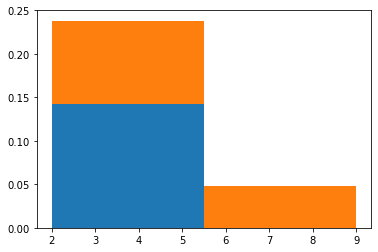

In [51]:
test_q1_4 = [likert_responses_per_question_real[0][4], likert_responses_per_question_placebo[0][4], likert_responses_per_question_nothing[0][4]]
test_q1_5 = [likert_responses_per_question_real[0][5], likert_responses_per_question_placebo[0][5], likert_responses_per_question_nothing[0][5]]
plt.figure()
plt.hist([test_q1_4,test_q1_5], 2, stacked=True, density=True)
plt.show()


In [52]:
pg.mwu(q18_scores_real,q18_scores_nothing, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,97.0,two-sided,0.295036,-0.24359,0.621795


In [53]:
pg.mwu(q18_scores_placebo,q18_scores_nothing, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,72.0,two-sided,0.752552,0.076923,0.461538


In [54]:
pg.mwu(q18_scores_real,q18_scores_placebo, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,94.5,two-sided,0.182815,-0.3125,0.65625


## Statistics

In [55]:
import statistics
competence_averages = [statistics.mean(competence_scores[i]) for i in range(len(competence_scores))]
competence_median = [statistics.median(competence_scores[i]) for i in range(len(competence_scores))]
competence_variance = [statistics.variance(competence_scores[i]) for i in range(len(competence_scores))]


benevolence_averages = [statistics.mean(benevolence_scores[i]) for i in range(len(benevolence_scores))]
benevolence_median = [statistics.median(benevolence_scores[i]) for i in range(len(benevolence_scores))]
benevolence_variance = [statistics.variance(benevolence_scores[i]) for i in range(len(benevolence_scores))]


integrity_averages = [statistics.mean(integrity_scores[i]) for i in range(len(integrity_scores))]
integrity_median = [statistics.median(integrity_scores[i]) for i in range(len(integrity_scores))]
integrity_variance = [statistics.variance(integrity_scores[i]) for i in range(len(integrity_scores))]


itr_averages = [statistics.mean(itr_scores[i]) for i in range(len(itr_scores))]
itr_median = [statistics.median(itr_scores[i]) for i in range(len(itr_scores))]
itr_variance = [statistics.variance(itr_scores[i]) for i in range(len(itr_scores))]


pt_averages = [statistics.mean(pt_scores[i]) for i in range(len(pt_scores))]
pt_median = [statistics.median(pt_scores[i]) for i in range(len(pt_scores))]
pt_variance = [statistics.variance(pt_scores[i]) for i in range(len(pt_scores))]



tb_averages = [statistics.mean(trusting_beliefs_scores[i]) for i in range(len(trusting_beliefs_scores))]
tb_median = [statistics.median(trusting_beliefs_scores[i]) for i in range(len(trusting_beliefs_scores))]
tb_variance = [statistics.variance(trusting_beliefs_scores[i]) for i in range(len(trusting_beliefs_scores))]


et_averages = [statistics.mean(explicit_trust_scores[i]) for i in range(len(explicit_trust_scores))]
et_median = [statistics.median(explicit_trust_scores[i]) for i in range(len(explicit_trust_scores))]
et_variance = [statistics.variance(explicit_trust_scores[i]) for i in range(len(explicit_trust_scores))]


ts_averages = [statistics.mean(md_trust_scores[i]) for i in range(len(md_trust_scores))]
ts_median = [statistics.median(md_trust_scores[i]) for i in range(len(md_trust_scores))]
ts_variance = [statistics.variance(md_trust_scores[i]) for i in range(len(md_trust_scores))]


q16_averages = [statistics.mean(q16_scores[i]) for i in range(len(competence_scores))]
q16_median = [statistics.median(q16_scores[i]) for i in range(len(competence_scores))]

q17_averages = [statistics.mean(q17_scores[i]) for i in range(len(competence_scores))]
q17_median = [statistics.median(q17_scores[i]) for i in range(len(competence_scores))]

q18_averages = [statistics.mean(q18_scores[i]) for i in range(len(competence_scores))]
q18_median = [statistics.median(q18_scores[i]) for i in range(len(competence_scores))]

q19_averages = [statistics.mean(q19_scores[i]) for i in range(len(competence_scores))]
q19_median = [statistics.median(q19_scores[i]) for i in range(len(competence_scores))]


q16_averages_all_round = statistics.mean(q16_scores[0]+q16_scores[1]+q16_scores[2])
q16_median_all_round = statistics.median(q16_scores[0]+q16_scores[1]+q16_scores[2])

q17_averages_all_round = statistics.mean(q17_scores[0]+q17_scores[1]+q17_scores[2])
q17_median_all_round = statistics.median(q17_scores[0]+q17_scores[1]+q17_scores[2])

q18_averages_all_round = statistics.mean(q18_scores[0]+q18_scores[1]+q18_scores[2])
q18_median_all_round = statistics.median(q18_scores[0]+q18_scores[1]+q18_scores[2])

q19_averages_all_round = statistics.mean(q19_scores[0]+q19_scores[1]+q19_scores[2])
q19_median_all_round = statistics.median(q19_scores[0]+q19_scores[1]+q19_scores[2])

print("Competence")
print(competence_averages)
print(competence_median)                                                                        
print(competence_variance) 
print("Benevolence")
print(benevolence_averages)
print(benevolence_median)                                                                            
print(benevolence_variance)                                                                            

  
print("Integrity")    
print(integrity_averages)
print(integrity_median)
print(integrity_variance)

                                                                          
                                                                        
print("Intention to return")
print(itr_averages)
print(itr_median)
print(itr_variance)
print("Perceived Transparency")
print(pt_averages)
print(pt_median)
print(pt_variance)
print("Trusting Beliefs")
print(tb_averages)
print(tb_median)                                                                          
print(tb_variance) 

print("Explicit Trust")
print(et_averages)
print(et_median)
print(et_variance)

print("MD Trust")
print(ts_averages)
print(ts_median)                                                                          
print(ts_variance) 

print("Q16")
print(q16_averages)
print(q16_median)                                                                          
    
print("Q17")
print(q17_averages)
print(q17_median)                                                                          
    
print("Q18")
print(q18_averages)
print(q18_median)                                                                          
    
print("Q19")
print(q19_averages)
print(q19_median)                                                                          
    
print("Q16 All Round")
print(q16_averages_all_round)
print(q16_median_all_round)  

print("Q17 All Round")
print(q17_averages_all_round)
print(q17_median_all_round)  
    
print("Q18 All Round")
print(q18_averages_all_round)
print(q18_median_all_round) 

print("Q19 All Round")
print(q19_averages_all_round)
print(q19_median_all_round)  

Competence
[28.25, 25.25, 25.76923076923077]
[30.5, 26.0, 27]
[24.931818181818183, 24.022727272727273, 20.358974358974358]
Benevolence
[18, 16.416666666666668, 16.384615384615383]
[18.0, 17.0, 16]
[2.727272727272727, 7.174242424242424, 3.7564102564102564]
Integrity
[18.333333333333332, 16.166666666666668, 17.846153846153847]
[19.0, 17.0, 18]
[4.606060606060606, 10.515151515151516, 4.4743589743589745]
Intention to return
[11.416666666666666, 10.5, 10.538461538461538]
[12.0, 11.5, 10]
[2.628787878787879, 4.818181818181818, 3.6025641025641026]
Perceived Transparency
[5.416666666666667, 4.25, 3.3846153846153846]
[5.5, 4.5, 3]
[2.628787878787879, 1.6590909090909092, 1.4230769230769231]
Trusting Beliefs
[17.761111111111113, 15.911111111111111, 16.564102564102562]
[18.366666666666667, 16.833333333333332, 16.400000000000002]
[4.0141077441077435, 7.425723905723906, 3.4249002849002856]
Explicit Trust
[5.916666666666667, 5.083333333333333, 5.3076923076923075]
[6.0, 6.0, 6]
[1.3560606060606062, 2.